In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [66]:
# Importing CSV file and creating a dataframe from it

df = pd.read_csv("Diwali Sales Data.csv" , encoding = "unicode_escape")
#to avoid encoding error, use 'unicode_escape'

Data Cleaning

In [67]:
df.shape
#it shows no of rows and columns, from this we can know that dataframe is created successfully.

(11251, 15)

In [68]:
df.head()
#it shows top 5 records, it is default

#df.head(10) -- it shows top 10 records

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [69]:
df.info()  #it will give you entire informations of the dataset i.e.,all entries,  all columnns, not null count, and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [70]:
#dropping unrelated /blank columns
df.drop(['Status','unnamed1'] , axis = 1 , inplace = True)
#axis=1 will delete all entries from that column
#inplace=True will remove that column from data frame information

In [71]:
#check for null
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [72]:
df.shape #checking no of rows before removing rows containing null values (11251 rows)

(11251, 13)

In [73]:
#drop null values
df.dropna(inplace = True)

In [74]:
df.shape #12 rows has been removed
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [75]:
#i want amount to be a whole no so changing it's datatype from float to int
df['Amount'] = df['Amount'].astype('int')

In [76]:
df['Amount'].dtypes

dtype('int64')

In [77]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [78]:
#changing Cust_name to Customer_name

df.rename(columns={'Cust_name':'Customer_name'} , inplace = True)
# df.head()

In [79]:
#describe() method returns description of the data in the DataFrame(i.e., count,mean,std,etc)

df[['Age' , 'Orders' , 'Amount']].describe() 

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


Exploratory Data Analysis

---GENDER---

In [80]:
df.columns

Index(['User_ID', 'Customer_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

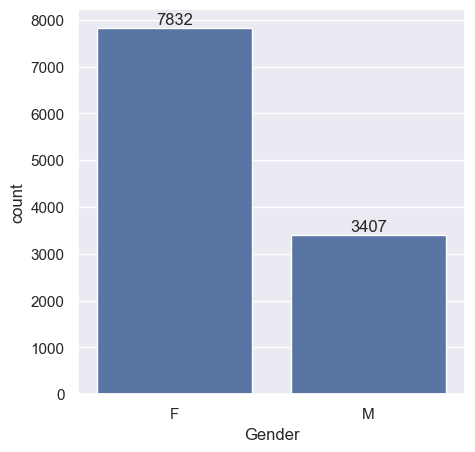

In [84]:

ax = sns.countplot(x = 'Gender' , data = df)

sns.set(rc={'figure.figsize':(5,5)})
for bars in ax.containers:
    ax.bar_label(bars)

  Gender    Amount
0      F  74335853
1      M  31913276


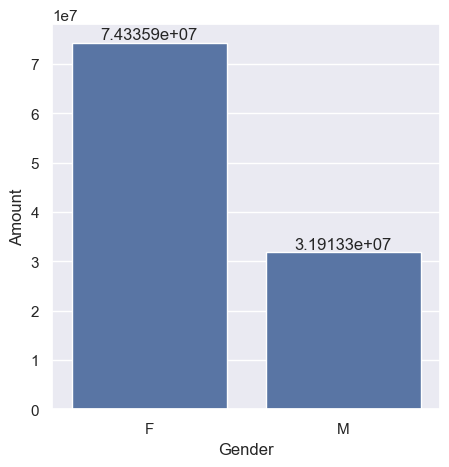

In [85]:
sales_gen = df.groupby(['Gender'] , as_index = False).agg({'Amount':'sum'}).sort_values(by='Amount' , ascending = False)
print(sales_gen)
ax = sns.barplot(x = 'Gender' , y = 'Amount' , data = sales_gen)

sns.set(rc={'figure.figsize':(5,5)})
for bars in ax.containers:
    ax.bar_label(bars)

Conclusion on the basis of gender - From the above graph we can see that most of the buyers are females and even the purchasing power of females are greater than males.

---Age---

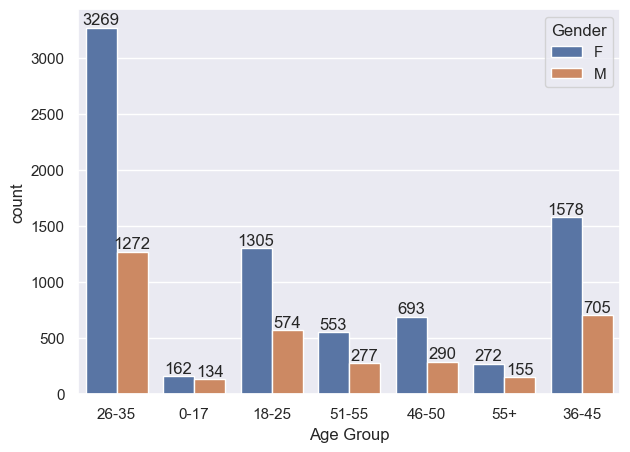

In [88]:
ax = sns.countplot(data = df , x = 'Age Group' , hue = 'Gender')

sns.set(rc={'figure.figsize':(10,5)})
for bars in ax.containers:
    ax.bar_label(bars)

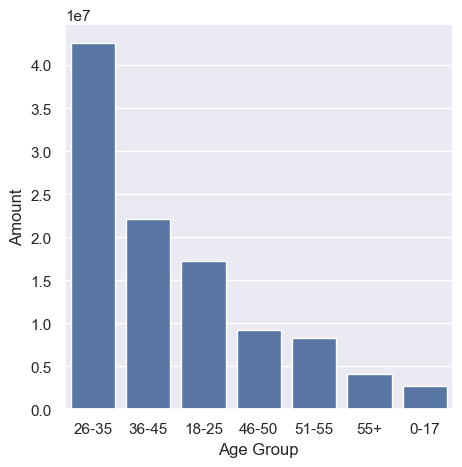

In [89]:
# Total Amount vs Age Group

sales_age_group = df.groupby(['Age Group'] , as_index = False)['Amount'].sum().sort_values(by = 'Amount' , ascending = False)
# sales_age_group

sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(data = sales_age_group , x = 'Age Group' , y = 'Amount')
plt.show()

Conclusion on the basis of gender - From the above graph we can see that most of the buyers are of age group between 26-35 years females

---State---

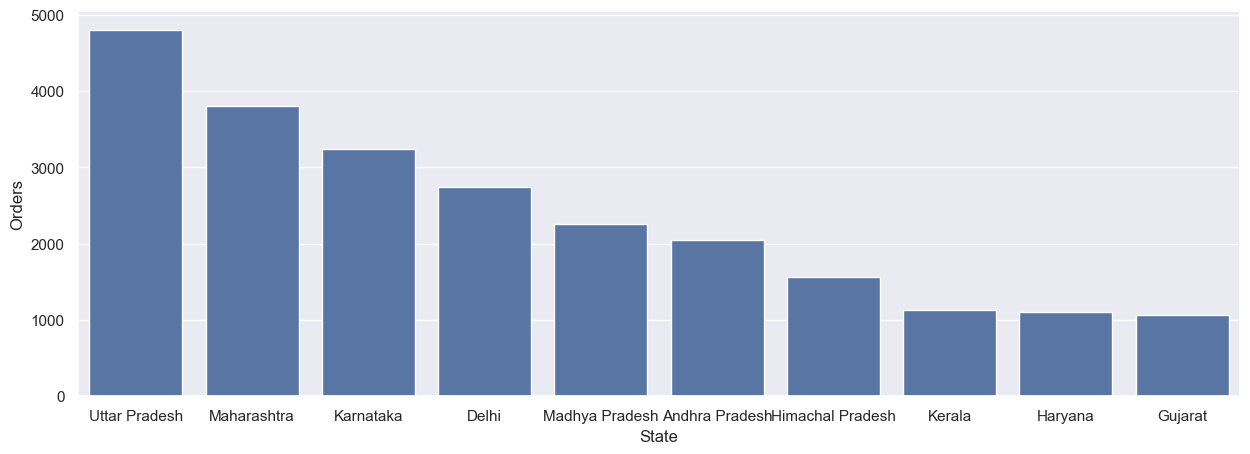

In [90]:
#total no of orders from top 10 states
order_state = df.groupby(['State'] , as_index=False)['Orders'].sum().sort_values(by='Orders' , ascending = False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=order_state , x = 'State' , y = 'Orders')
plt.show()

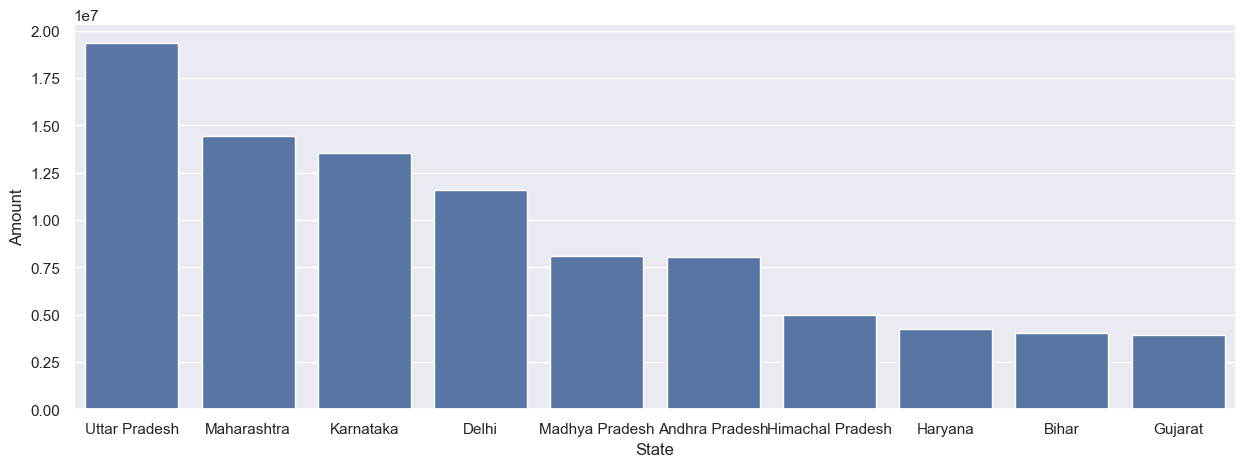

In [91]:
#total amount/sales from top 10 states

sales_state = df.groupby('State',as_index=False).agg({'Amount':'sum'}).sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state , x = 'State' , y = 'Amount')
plt.show()

From the above graph we can see that unexpectedly most of the orders and total sales are from Maharastra, Uttar Pradesh and Karnataka respectively.

---Marital Status---

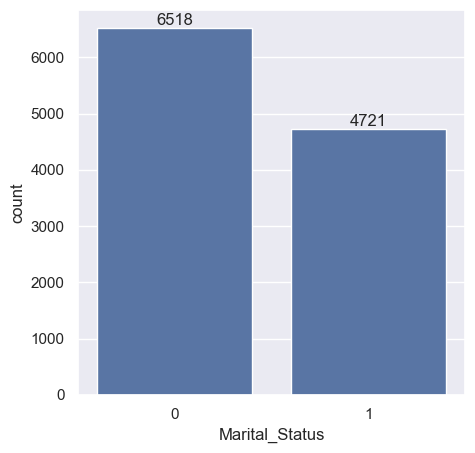

In [93]:
ax = sns.countplot(data = df , x = 'Marital_Status')

sns.set(rc={'figure.figsize':(5,5)})
for bars in ax.containers:
    ax.bar_label(bars)

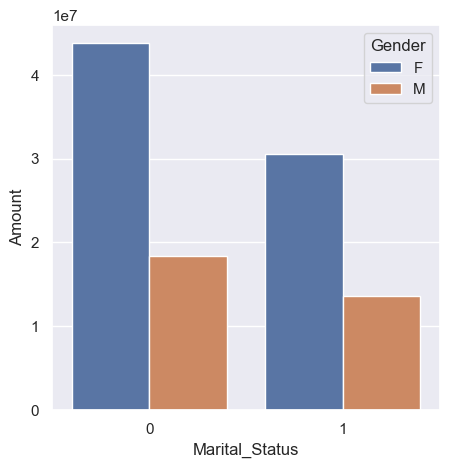

In [98]:
sales_marital_status = df.groupby(['Marital_Status','Gender'],as_index=False).agg({'Amount':'sum'}).sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(data = sales_marital_status , x = 'Marital_Status' , y = 'Amount' , hue = 'Gender')
plt.show()

From the above graph we can see that most of the buyers are unmarried(females) and they have high purchasing power

---Occupation---

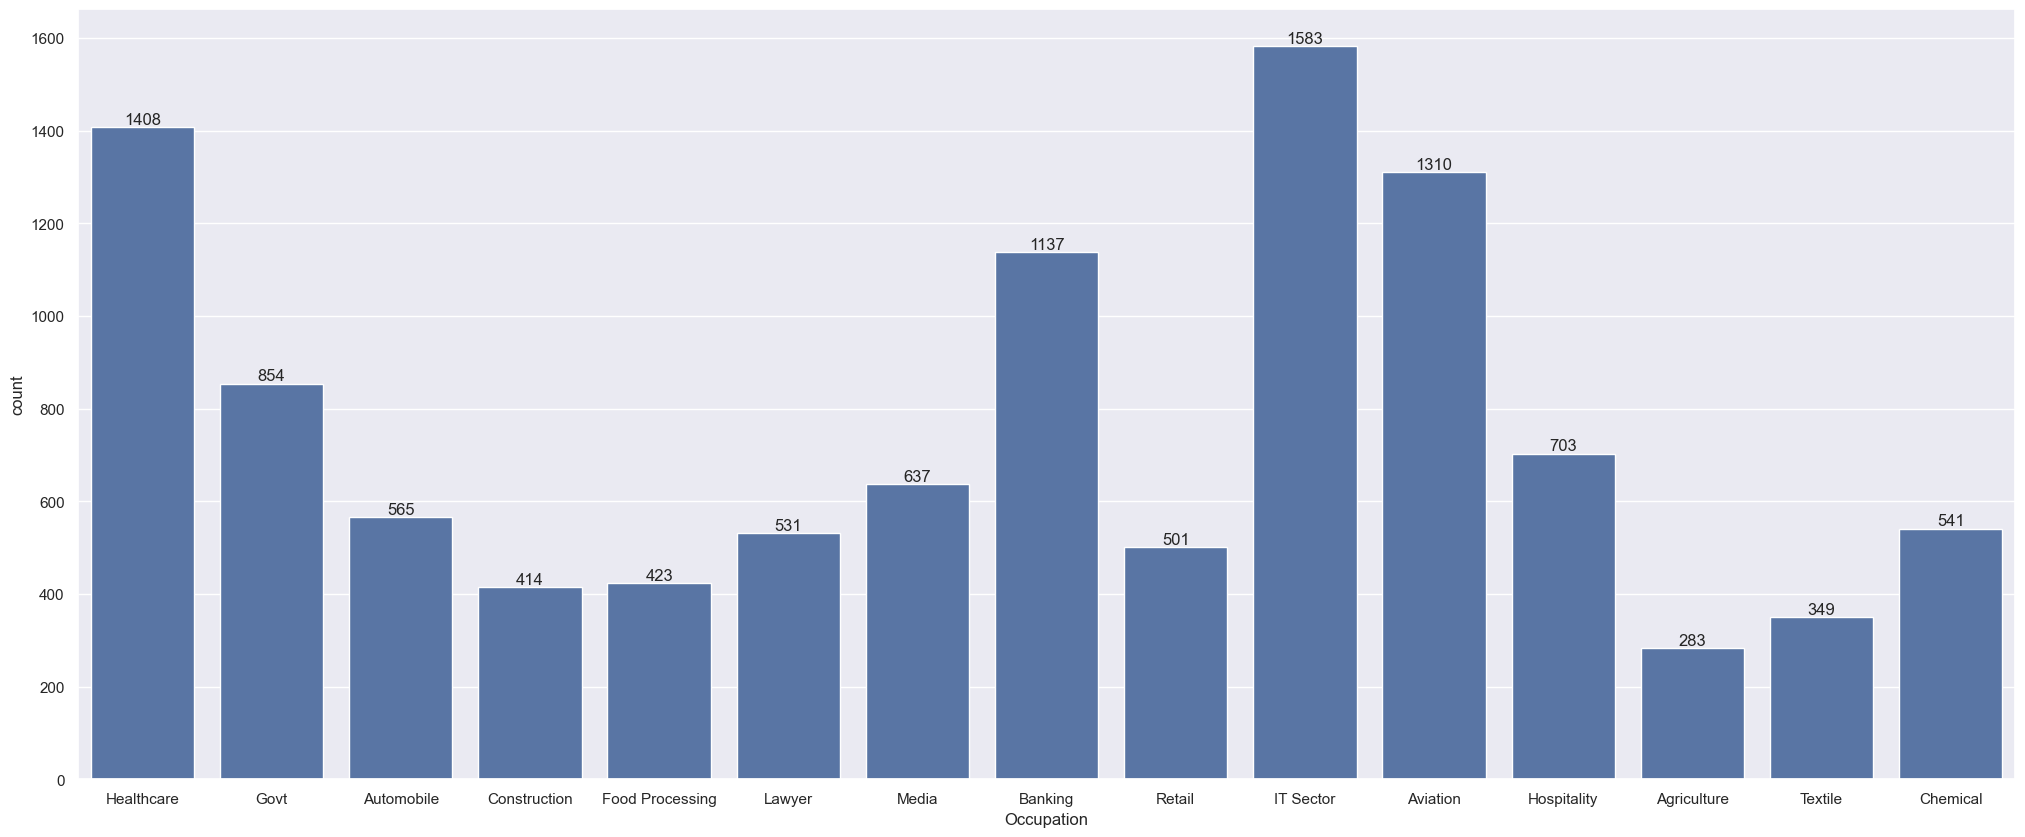

In [100]:
ax = sns.countplot(data = df , x = 'Occupation')

sns.set(rc={'figure.figsize':(25,10)})
for bars in ax.containers:
    ax.bar_label(bars)

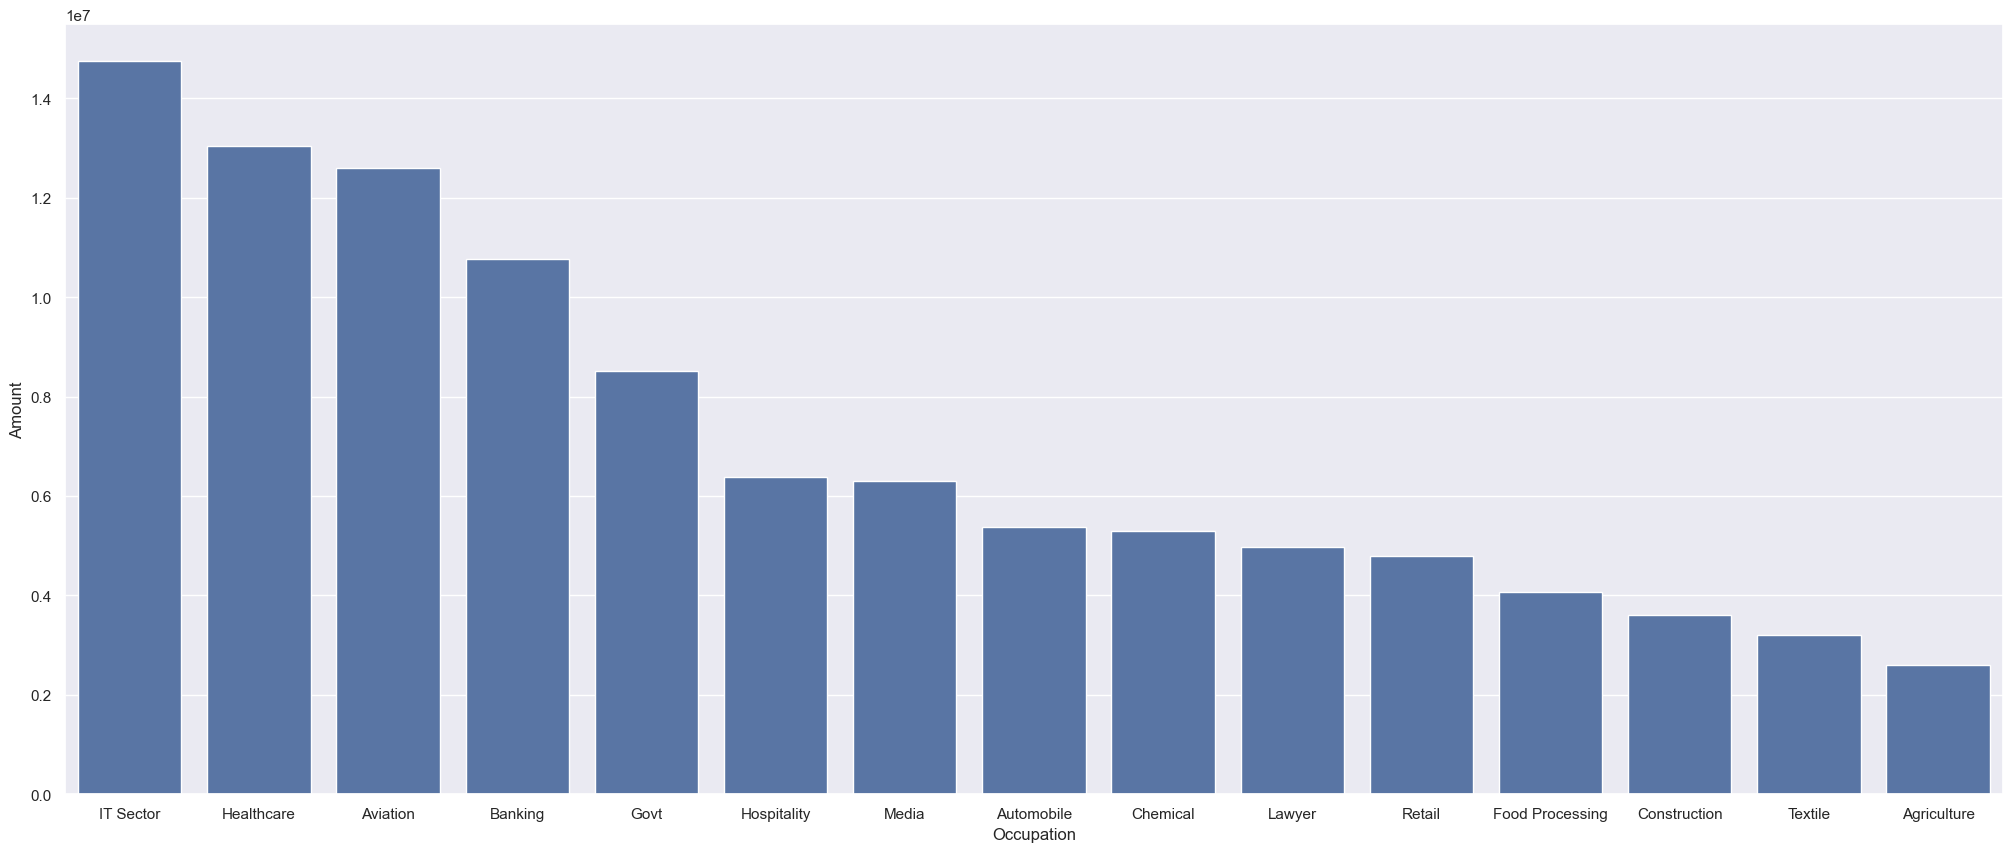

In [101]:
sales_occupation = df.groupby('Occupation',as_index=False).agg({'Amount':'sum'}).sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize':(25,10)})
sns.barplot(data = sales_occupation , x = 'Occupation' , y = 'Amount')
plt.show()

From above graph we can see that most of the buyers are working in IT sectors, Aviation and Healthcare

---Product Category---

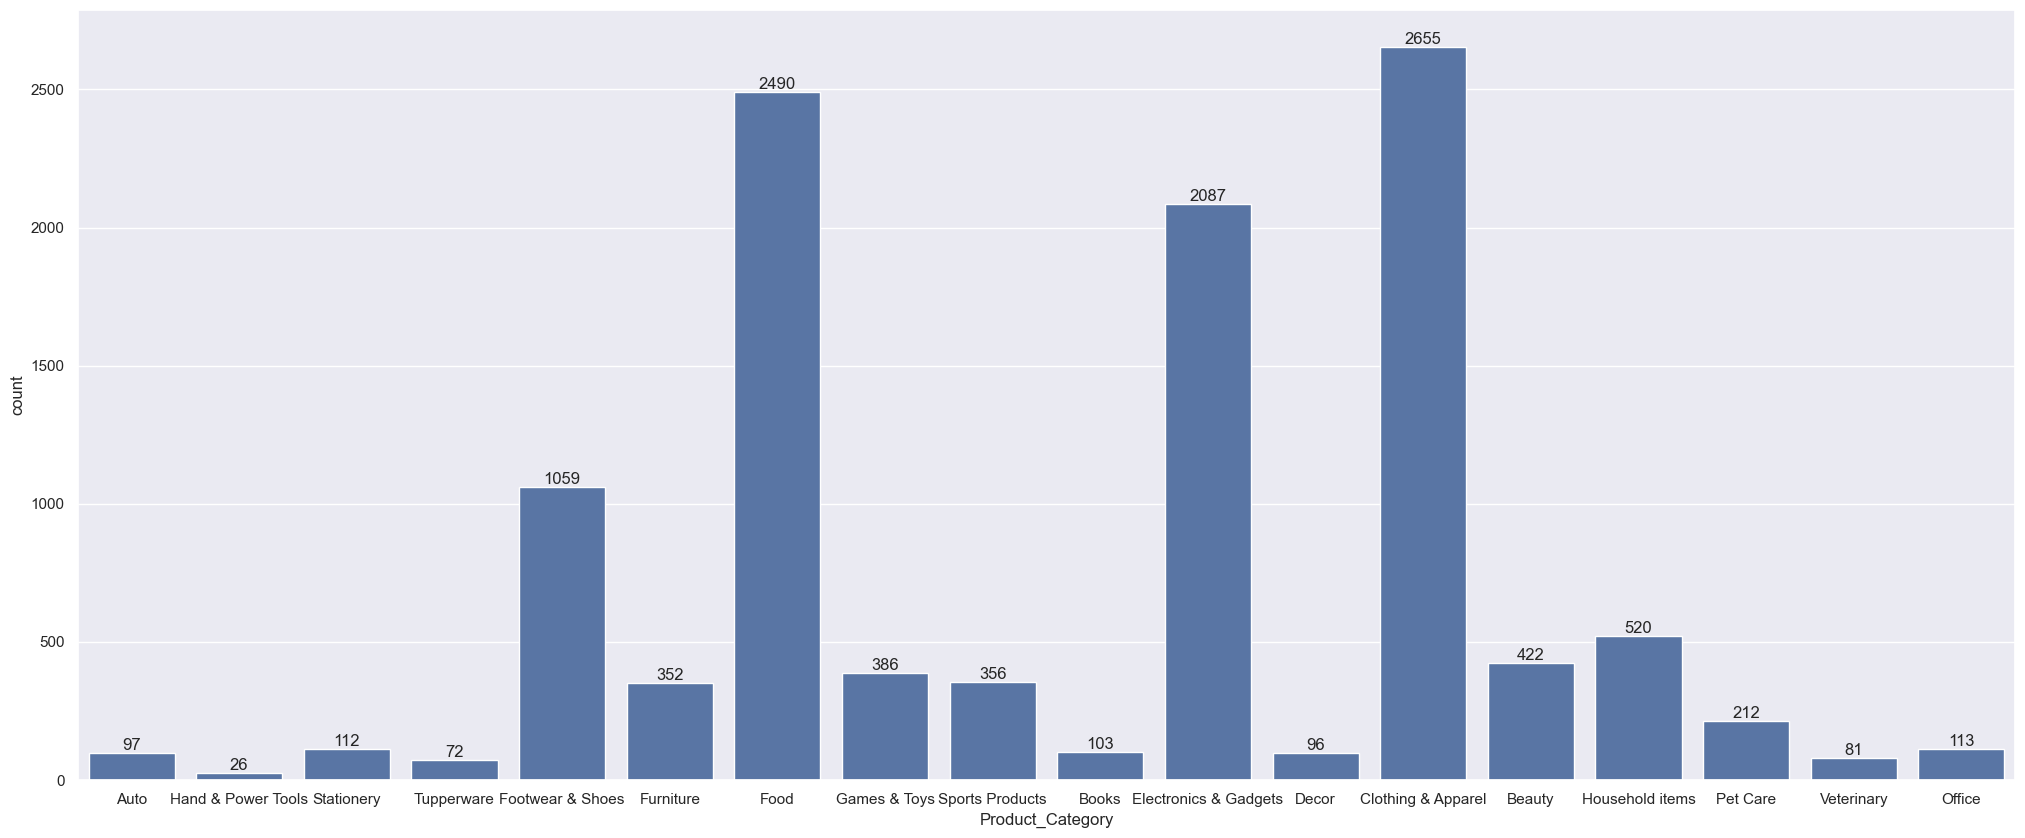

In [110]:
ax = sns.countplot(data = df , x = 'Product_Category')

sns.set(rc={'figure.figsize':(25,10)})
for bars in ax.containers:
    ax.bar_label(bars)

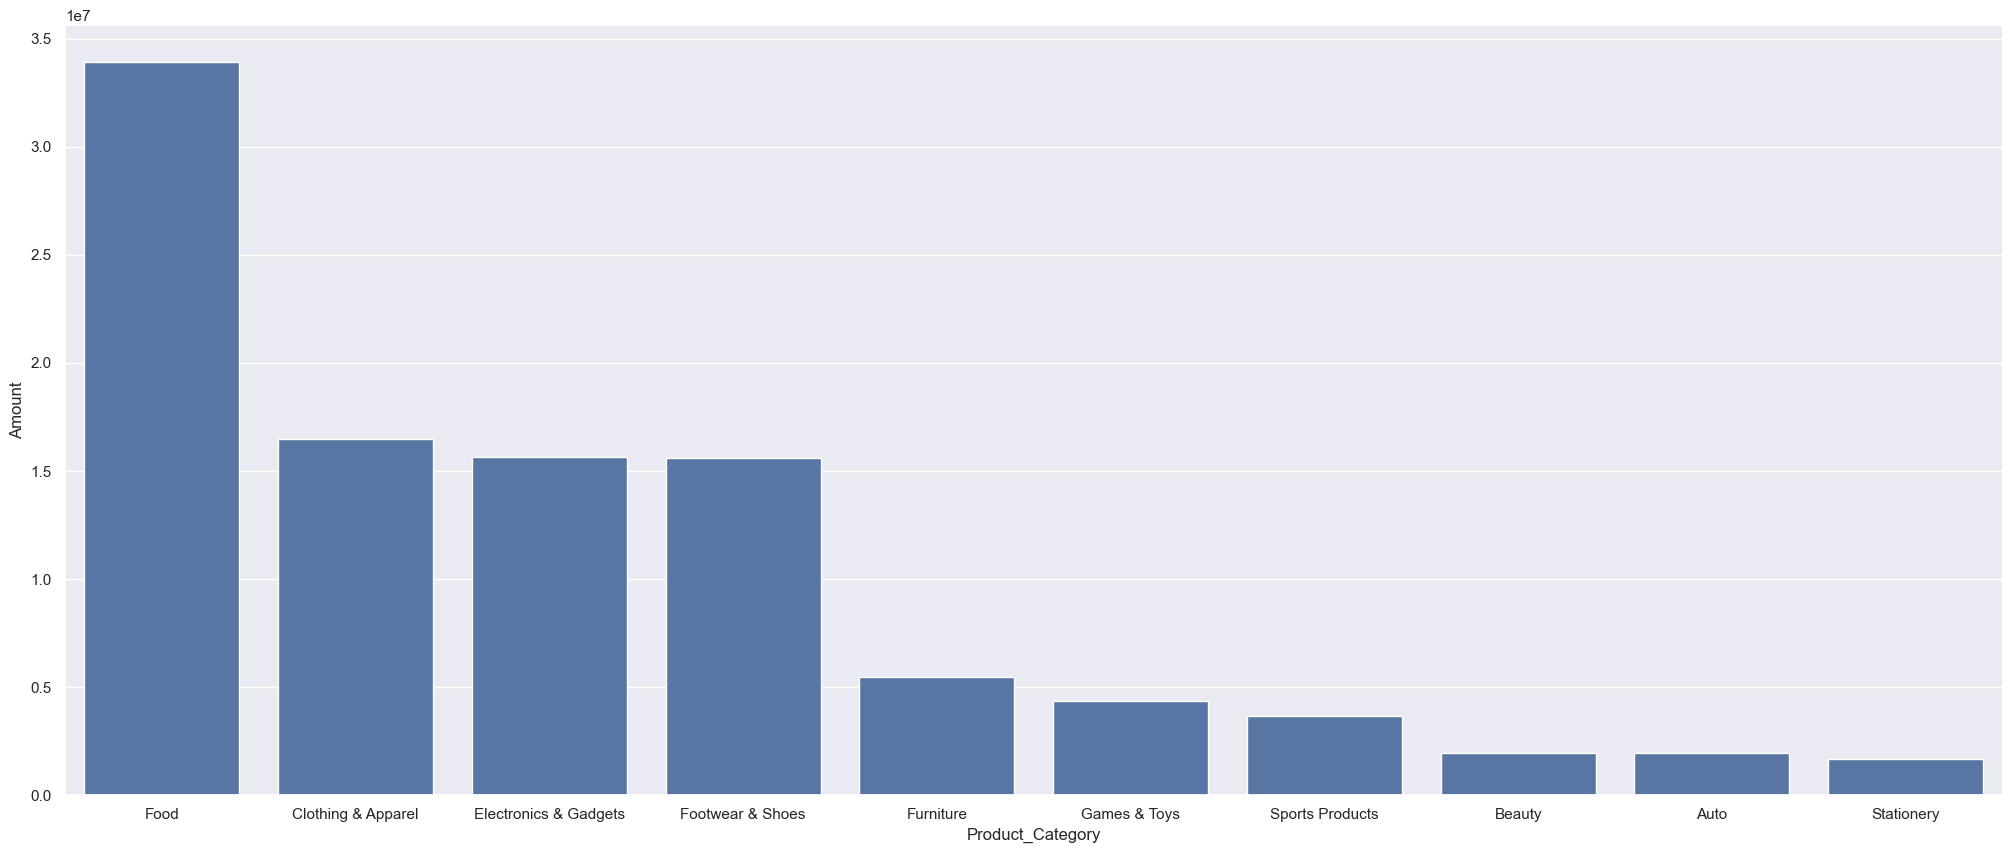

In [114]:
sales_product_category = df.groupby('Product_Category',as_index=False).agg({'Amount':'sum'}).sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(25,10)})
sns.barplot(data = sales_product_category , x = 'Product_Category' , y = 'Amount')
plt.show()

From above graphs we can see that most sales occured in food then clothing then electronics & gadgets category